# Notebook for Gumble distribution and avg (max (density))

In [3]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
import scipy.integrate as integrate
import h5py
from mayavi import mlab

# from readgadget import *
# from pygadgetreader import *
ColorsI = ["red","blue","green","purple","darkcyan","gold","maroon","black","darkslategrey",
           "darkgreen","navy","indigo","magenta","salmon","dodgerblue","springgreen","plum",
           "cyan","khaki","lightcoral","gray"]
ColorsII = []

NUM_COLORS = 20
from matplotlib.colors import LogNorm

cm = plt.get_cmap('gist_rainbow')
# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'
from matplotlib import colors, ticker, cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from collections import defaultdict

from mpl_toolkits.mplot3d import Axes3D


In [97]:
def nested_dict(n, type):
    if n == 1:
        return defaultdict(type)
    else:
        return defaultdict(lambda: nested_dict(n-1, type))
    
data = nested_dict(5, list)
maximum = nested_dict(5, list)
variance = nested_dict(5, list)
avg = nested_dict(5, list)

In [98]:
descrip=["L-50-Ngrid-128-seed1","L-100-Ngrid-128-seed1","L-150-Ngrid-128-seed1",
      "L-200-Ngrid-128-seed1","L-300-Ngrid-64-seed1","L-300-Ngrid-128-seed1",
      "L-300-Ngrid-128-seed2","L-300-Ngrid-128-seed3","L-300-Ngrid-128-seed4",
      "L-600-Ngrid-128-seed1","L-900-Ngrid-128-seed1","L-1200-Ngrid-128-seed1",
      "L-2400-Ngrid-128-seed1","L-3600-Ngrid-128-seed1","L-300_Ngrid-32_seed1","L-300-Ngrid-256-seed1","L-300-Ngrid-512-seed1"]

name=["L_50_Ngrid_128_seed1","L_100_Ngrid_128_seed1","L_150_Ngrid_128_seed1",
      "L_200_Ngrid_128_seed1","L_300_Ngrid_64_seed1","L_300_Ngrid_128_seed1",
      "L_300_Ngrid_128_seed2","L_300_Ngrid_128_seed3","L_300_Ngrid_128_seed4",
      "L_600_Ngrid_128_seed1","L_900_Ngrid_128_seed1","L_1200_Ngrid_128_seed1",
      "L_2400_Ngrid_128_seed1","L_3600_Ngrid_128_seed1","L_300_Ngrid_32_seed1","L_300_Ngrid_256_seed1","L_300_Ngrid_512_seed1"]
num=np.shape(name)[0]
for i in range(0,num):

    files= h5py.File('./..//output/'+name[i]+'/lcdm_snap000_rhoN.h5', "r") 
#     hh= h5py.File('./CSCS_data_runs_Jan28/Blowup_sims/cs2_e7/solo_kess_eq/non_linear/cs2_e7_Ngrid_16_dtau_04/output////zeta_'+str(i)+'.h5', "r") 

    data[name[i]] = files['data']
    maximum[name[i]]=np.max( files['data']);
    variance[name[i]]=np.std( files['data']);
    avg[name[i]]=np.mean( files['data']);



# Maximum plots

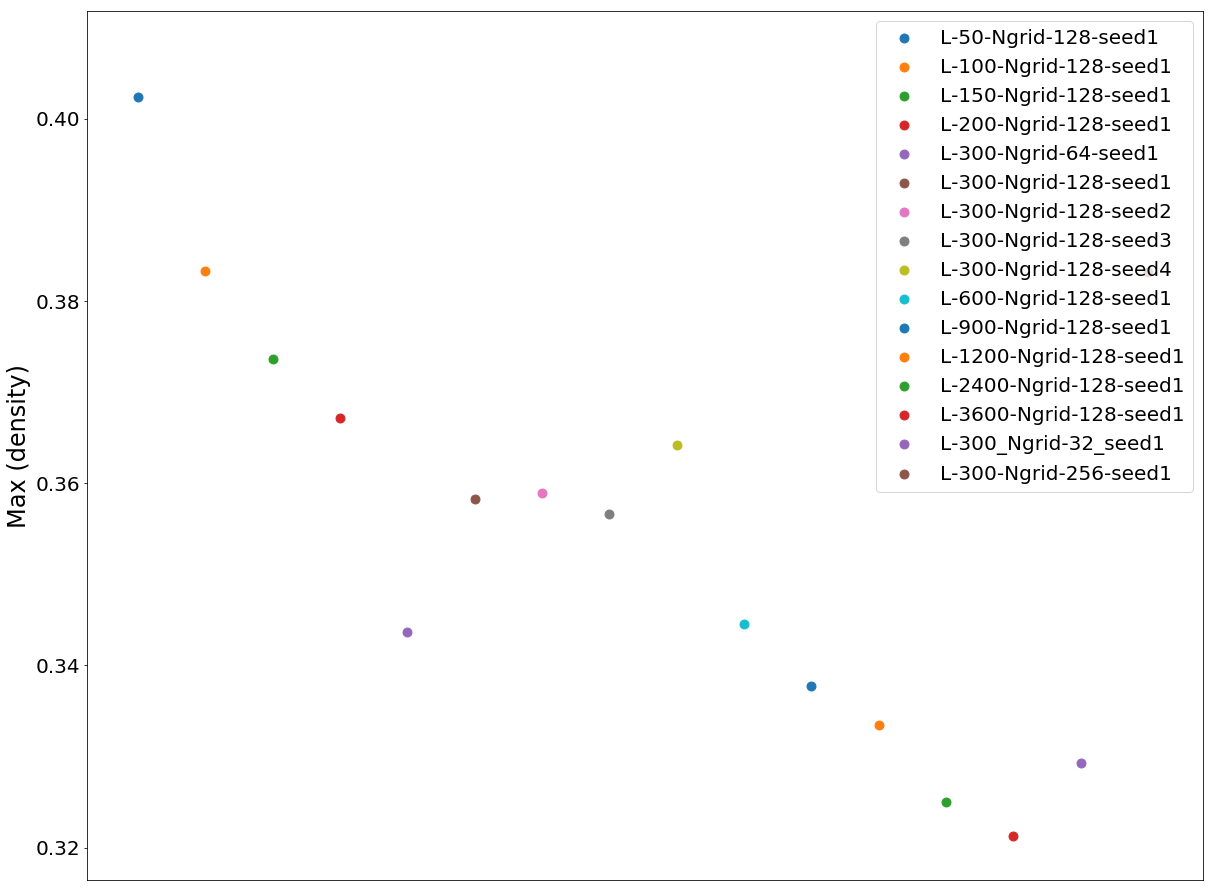

In [69]:
plt.figure(figsize=(20,16))

x = np.arange(0,num,1)
for i in range(0,num):
    plt.scatter(i,maximum[name[i]],s=80,label=descrip[i])
    plt.legend(fontsize=20)     
    
    
plt.tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,labelsize=20) 
plt.tick_params(labelsize=20) 
plt.ylabel("Max (density)",fontsize=24)
plt.show()


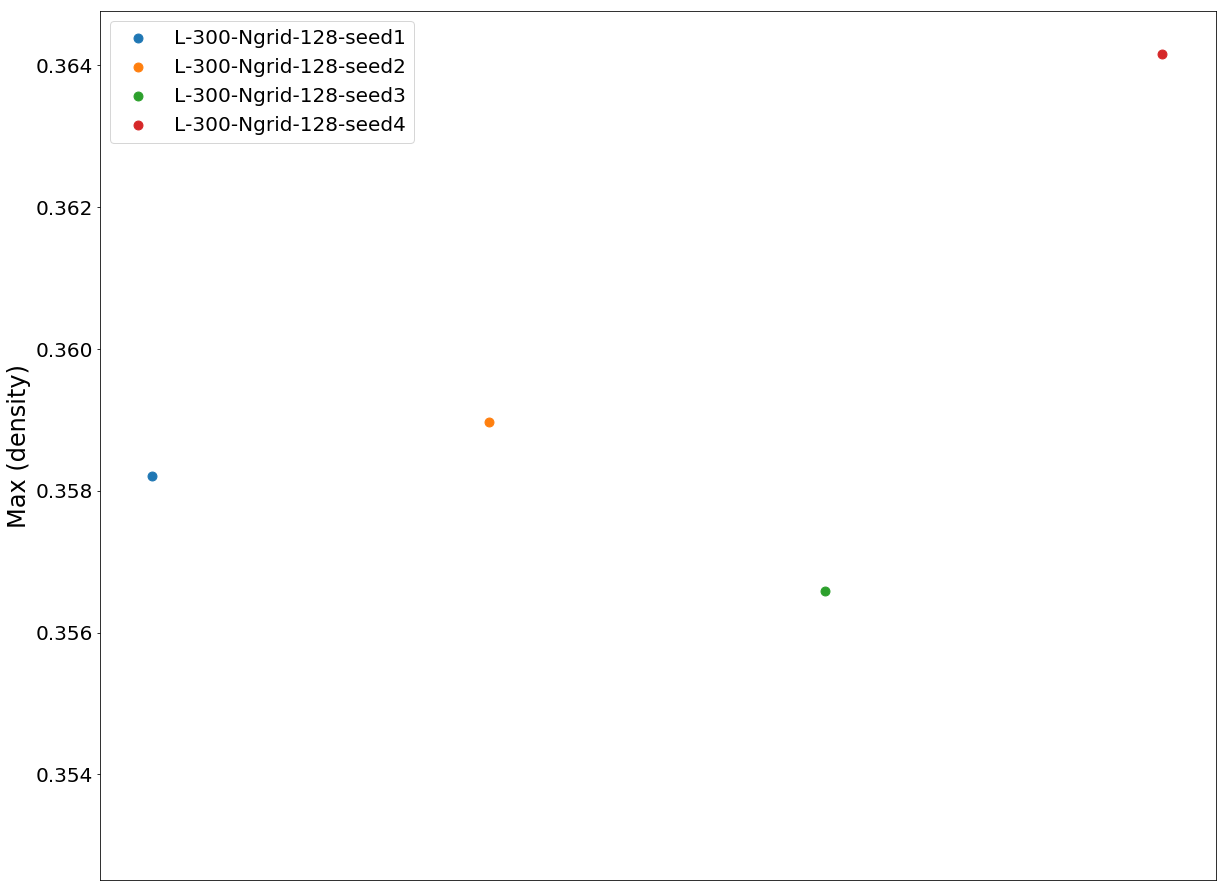

In [70]:
plt.figure(figsize=(20,16))

x = np.arange(0,num,1)
for i in [5,6,7,8]:
    plt.scatter(i,maximum[name[i]],s=80,label=descrip[i])
    plt.legend(fontsize=20)     
    
plt.tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False,labelsize=20) 
plt.tick_params(labelsize=20) 
plt.ylabel("Max (density)",fontsize=24)
plt.show()


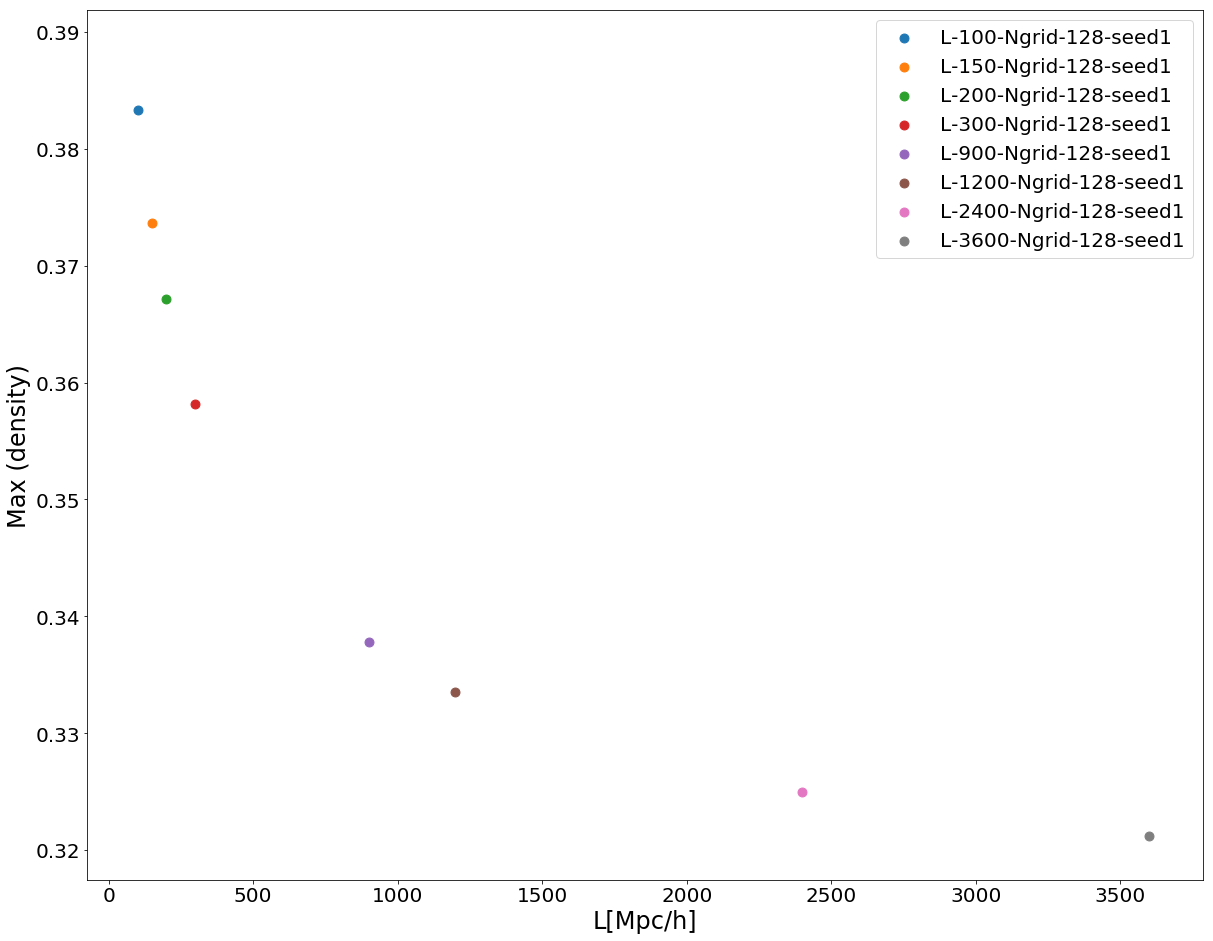

In [91]:
plt.figure(figsize=(20,16))

L = [100,150,200,300,900,1200,2400,3600]
x = np.arange(0,num,1)
l=0
for i in [1,2,3,5,10,11,12,13]:
    plt.scatter(L[l],maximum[name[i]],s=80,label=descrip[i])
    plt.legend(fontsize=20)     
    l=l+1
    
# plt.tick_params(axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False,labelsize=20) 
plt.tick_params(labelsize=20) 
plt.ylabel("Max (density)",fontsize=24)
plt.xlabel("L[Mpc/h]",fontsize=24)

plt.show()


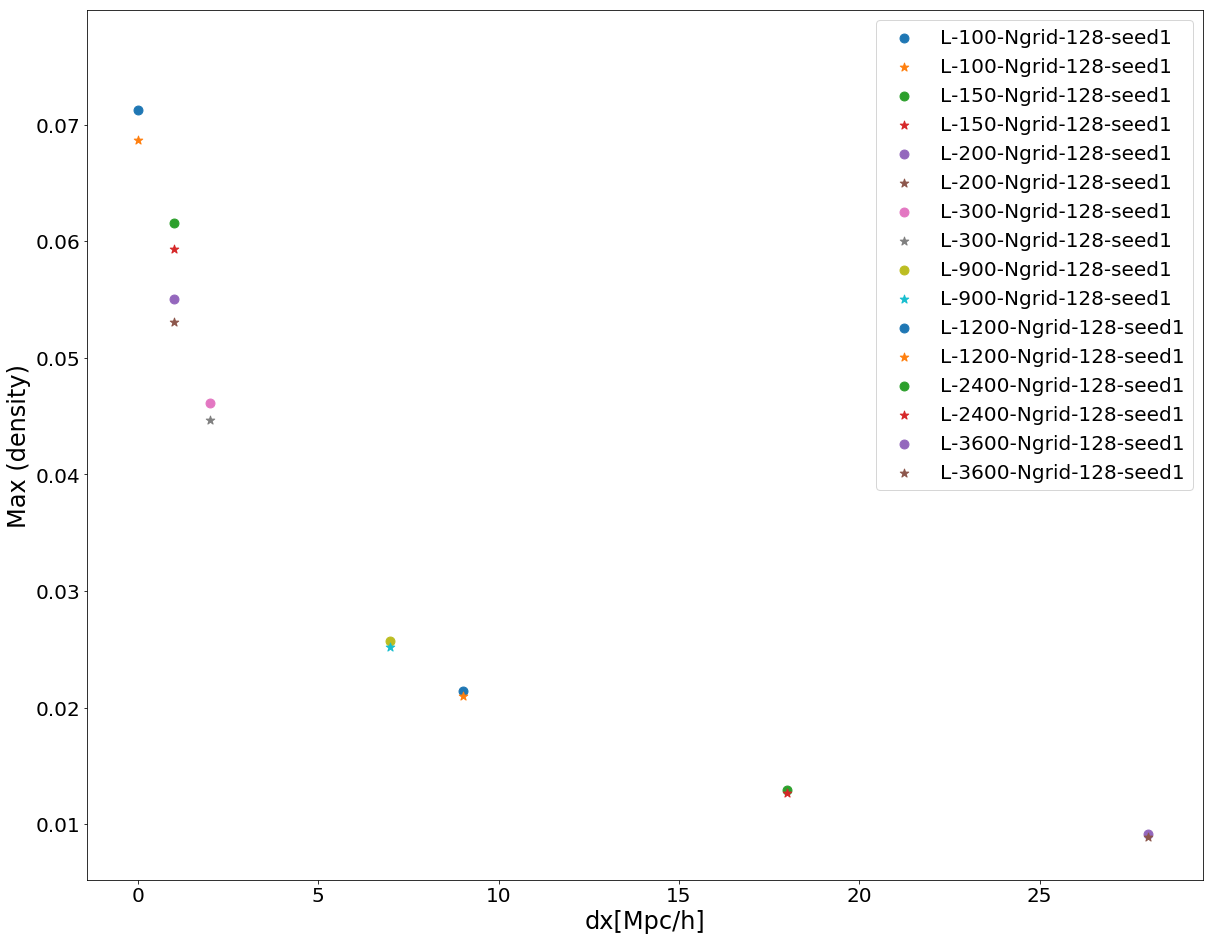

In [112]:
plt.figure(figsize=(20,16))

L = [100,150,200,300,900,1200,2400,3600]
x = np.arange(0,num,1)
l=0
for i in [1,2,3,5,10,11,12,13]:
    plt.scatter(L[l]/128,maximum[name[i]]-avg[name[i]],s=80,label=descrip[i])
    plt.scatter(L[l]/128, 0.9* variance[name[i]]*np.sqrt(2.*np.log(128**3)),marker="*",s=80,label=descrip[i])
# variance[name[i]]
    plt.legend(fontsize=20)     
    l=l+1
    
# plt.tick_params(axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False,labelsize=20) 
plt.tick_params(labelsize=20)
plt.ylabel("Max (density)",fontsize=24)
plt.xlabel("dx[Mpc/h]",fontsize=24)

plt.show()


AttributeError: 'module' object has no attribute 'Log'

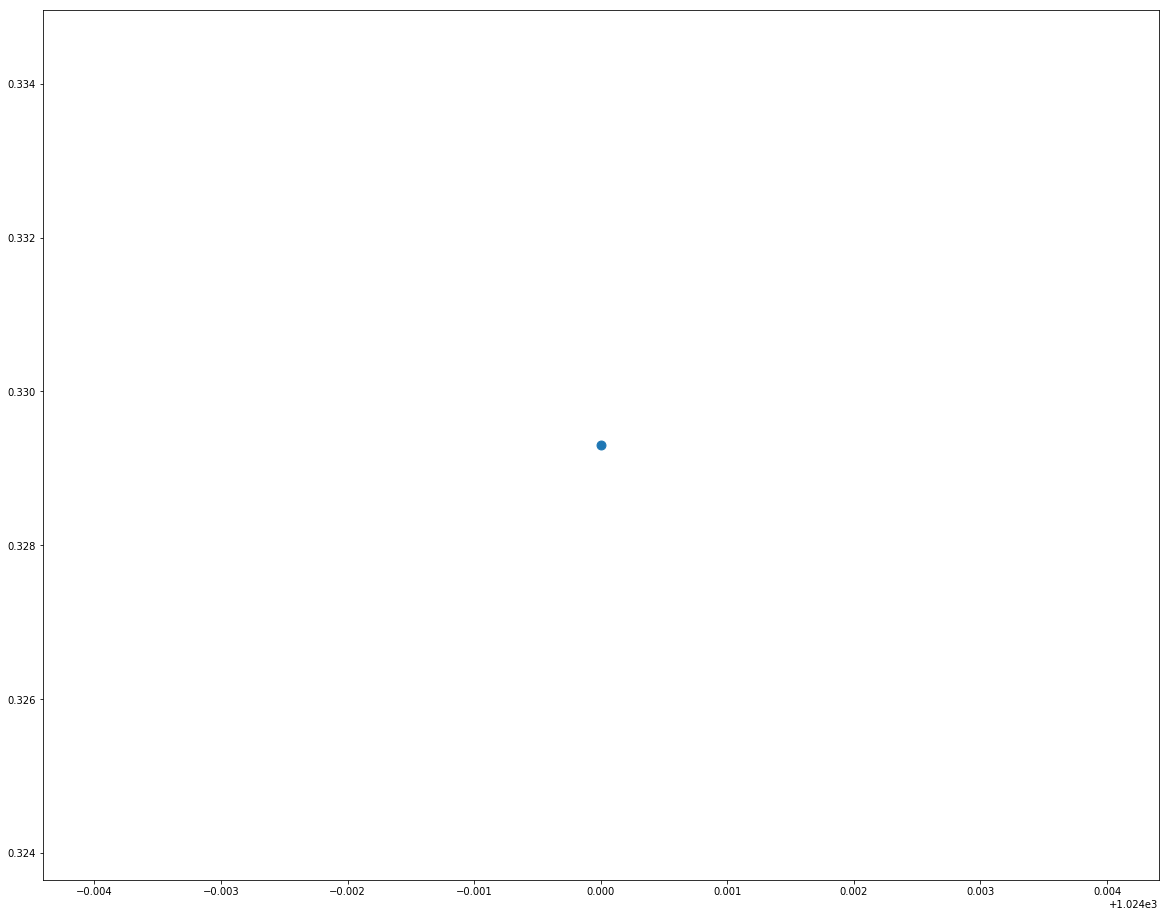

In [81]:
plt.figure(figsize=(20,16))

Ngrid = [32,64,128,256,512]
x = np.arange(0,num,1)
l=0
for i in [14,4,5,15,16]:
    plt.scatter(Ngrid[l]**2,maximum[name[i]],s=80,label=descrip[i])
    plt.scatter(np.Log(Ngrid[l]**3),s=80,label=descrip[i])

    plt.legend(fontsize=20)     
    l=l+1
    
# plt.tick_params(axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False,labelsize=20) 
plt.tick_params(labelsize=20) 
plt.ylabel("Max (density)",fontsize=24)
plt.xlabel("Ngrid",fontsize=24)

plt.show()
